In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
from math import factorial
from functools import reduce
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

In [3]:
print(calls.info())
calls.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [4]:
print(calls.isnull().sum())
calls.duplicated().sum()

id           0
call_date    0
duration     0
user_id      0
dtype: int64


0

В файле с звонками достаточное количество звонков с 0 длительностью, так как они есть в нашей выборке сведетельствует от том что звонок совершился, я предполагаю что это звонки которые сразу сбрасывали после поднятия. Многие операторые тарифицируют любой звонок меньше минуты как минутный, пользуясь данной логикой я прировняю все нули к 1.

так же для дальнейшей работы я из даты извлеку месяц и год 

In [5]:
calls['call_date'] = pd.to_datetime(calls['call_date'])
calls['month'] = calls['call_date'].apply(lambda time: time.month)
calls['year'] = calls['call_date'].apply(lambda t: t.year)

In [6]:
calls.loc[(calls['duration'] == 0), 'duration'] = 1
calls.head(10)

,id,call_date,duration,user_id,month,year
0,1000_0,2018-07-25,1.00,1000,7,2018
1,1000_1,2018-08-17,1.00,1000,8,2018
2,1000_2,2018-06-11,2.85,1000,6,2018
3,1000_3,2018-09-21,13.80,1000,9,2018
4,1000_4,2018-12-15,5.18,1000,12,2018
5,1000_5,2018-11-02,1.00,1000,11,2018
6,1000_6,2018-10-18,1.00,1000,10,2018
7,1000_7,2018-08-22,18.31,1000,8,2018
8,1000_8,2018-09-15,18.44,1000,9,2018
9,1000_9,2018-08-15,1.00,1000,8,2018


пропусков и дуликаов а таблице нет, других ошибок я не вижу.

In [7]:
print(messages.info())
messages.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [8]:
print(messages.isnull().sum())
messages.duplicated().sum()

id              0
message_date    0
user_id         0
dtype: int64


0

In [9]:
messages['message_date'] = pd.to_datetime(messages['message_date'])
messages['month'] = messages['message_date'].apply(lambda time: time.month)
messages['year'] = messages['message_date'].apply(lambda t: t.year)

в данных с сообщениями нет пропусков и дубликатов, других ошибок я так же не вижу,

из даты извлек месяц/год

In [10]:
print(internet.info())
internet.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB
None


,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
5,1000_5,399.97,2018-10-02,1000
6,1000_6,540.08,2018-09-07,1000
7,1000_7,415.70,2018-07-11,1000
8,1000_8,505.40,2018-10-08,1000
9,1000_9,345.54,2018-09-03,1000


In [11]:
print(internet.isnull().sum())
internet.duplicated().sum()

id              0
mb_used         0
session_date    0
user_id         0
dtype: int64


0

In [12]:
internet['session_date'] = pd.to_datetime(internet['session_date'])
internet['month'] = internet['session_date'].apply(lambda time: time.month)
internet['year'] = internet['session_date'].apply(lambda t: t.year)


в данных с интернет трафиком нет пропусков и дубликатов, других ошибок я так же не вижу,

из даты извлек месяц/год

In [13]:
print(tariffs.info())
tariffs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mg_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None


,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [14]:
print(users.info())
users.head(10)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [15]:
print(users.isnull().sum())
users.duplicated().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64


0

In [16]:
users['churn_date'] = users['churn_date'].fillna(-1)
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['month'] = users['reg_date'].apply(lambda time: time.month)
users['year'] = users['reg_date'].apply(lambda t: t.year)


В столбце churn_date большенство значений - пропуски, тк абоненты являются таковыми по нв. я заполню пропуски индикаторным значением -1

Таблица users (информация о пользователях):

    user_id — уникальный идентификатор пользователя
    first_name — имя пользователя
    last_name — фамилия пользователя
    age — возраст пользователя (годы)
    reg_date — дата подключения тарифа (день, месяц, год)
    churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
    city — город проживания пользователя
    tariff — название тарифного плана

Таблица calls (информация о звонках):

    id — уникальный номер звонка
    call_date — дата звонка
    duration — длительность звонка в минутах
    user_id — идентификатор пользователя, сделавшего звонок

Таблица messages (информация о сообщениях):

    id — уникальный номер сообщения
    message_date — дата сообщения
    user_id — идентификатор пользователя, отправившего сообщение

Таблица internet (информация об интернет-сессиях):

    id — уникальный номер сессии
    mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
    session_date — дата интернет-сессии
    user_id — идентификатор пользователя

Таблица tariffs (информация о тарифах):

    tariff_name — название тарифа
    rub_monthly_fee — ежемесячная абонентская плата в рублях
    minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
    messages_included — количество сообщений в месяц, включённых в абонентскую плату
    mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
    rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
    rub_per_message — стоимость отправки сообщения сверх тарифного пакета
    rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

In [17]:
total_calls = calls.pivot_table(index=['user_id','month'],values='duration',aggfunc=['count','sum'])
total_calls.reset_index(inplace=True)
total_calls.columns = ['user_id','month','calls_count','calls_sum']
total_calls

,user_id,month,calls_count,calls_sum
0,1000,5,22,155.06
1,1000,6,43,173.90
2,1000,7,47,324.80
3,1000,8,52,399.87
4,1000,9,58,452.14
...,...,...,...,...
3169,1498,10,41,243.63
3170,1499,9,9,65.65
3171,1499,10,68,453.91
3172,1499,11,74,588.50


Создал сводную таблицу по звонкам, в качестве индексов использовал месяц и айд пользователя, внутри таблицы показывается сксолько и как долго каждый пользователь разговаривал в каждый из месяцов

In [18]:
total_messages = messages.pivot_table(index=['user_id','month'], values='message_date', aggfunc=['count'])
total_messages.reset_index(inplace=True)
total_messages.columns = ['user_id','month','message_count']
total_messages

,user_id,month,message_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


Создал сводную таблицу по сообщениям, в качестве индексов использовал месяц и айд пользователя, внутри таблицы показывается сколько сообщений пользователи отправили в каждый из месяцов

In [19]:
total_internet = internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc=['sum'])
total_internet.reset_index(inplace=True)
total_internet.columns = ['user_id','month','mb_sum']
total_internet

,user_id,month,mb_sum
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91
...,...,...,...
3198,1498,10,20579.36
3199,1499,9,1845.75
3200,1499,10,17788.51
3201,1499,11,17963.31


Создал сводную таблицу по интернет трафику, в качестве индексов использовал месяц и айд пользователя, внутри таблицы показывается сколько интернет трафика пользователи тратили в каждый из месяцов

In [20]:
dfs = [total_internet, total_messages, total_calls]
total_users = reduce(lambda left,right: pd.merge(left,right, how='outer'), dfs)

In [21]:
total_users.head(10)

,user_id,month,mb_sum,message_count,calls_count,calls_sum
0,1000,5,2253.49,22.0,22.0,155.06
1,1000,6,23233.77,60.0,43.0,173.90
2,1000,7,14003.64,75.0,47.0,324.80
3,1000,8,14055.93,81.0,52.0,399.87
4,1000,9,14568.91,57.0,58.0,452.14
5,1000,10,14702.49,73.0,57.0,341.45
6,1000,11,14756.47,58.0,43.0,325.04
7,1000,12,9817.61,70.0,46.0,320.98
8,1001,11,18429.34,NaN,59.0,422.12
9,1001,12,14036.66,NaN,63.0,407.34


при помощи reduce я обьеденил 3 полученные таблицы в 1

In [22]:
total_users = total_users.merge(users,on='user_id',how='left')
total_users = pd.DataFrame(total_users)

после чего обущю талицу соединил с таблицей users используя merge

In [23]:

del total_users['first_name']
del total_users['last_name']
del total_users['reg_date']
del total_users['month_y']
del total_users['year']


из финальной таблицы я удалил ненужные мне для исследования столбцы

In [24]:
total_users = total_users.fillna(0)
total_users['mb_sum'] = total_users['mb_sum'] / 1024
total_users.rename(columns={'mb_sum': 'gb_sum'}, inplace=True)
total_users['gb_sum'] = np.ceil(total_users['gb_sum'], out = None).astype('int')
total_users

,user_id,month_x,gb_sum,message_count,calls_count,calls_sum,age,churn_date,city,tariff
0,1000,5,3,22.0,22.0,155.06,52,-1,Краснодар,ultra
1,1000,6,23,60.0,43.0,173.90,52,-1,Краснодар,ultra
2,1000,7,14,75.0,47.0,324.80,52,-1,Краснодар,ultra
3,1000,8,14,81.0,52.0,399.87,52,-1,Краснодар,ultra
4,1000,9,15,57.0,58.0,452.14,52,-1,Краснодар,ultra
...,...,...,...,...,...,...,...,...,...,...
3209,1273,11,0,29.0,45.0,270.14,46,-1,Курган,ultra
3210,1273,12,0,39.0,41.0,244.59,46,-1,Курган,ultra
3211,1377,2,0,2.0,23.0,171.55,59,-1,Брянск,ultra
3212,1392,2,0,3.0,2.0,11.96,54,2018-09-27,Челябинск,ultra


изза того что многие пользователи являлись абонентами не весь год в таблице получилось много пропусков, их я заполнил нулями.

столб с мегабайтами я превратил в гигабайты,(поделив на 1024) округлил значение в большую сторону и сменил тип данных на int

In [25]:
total_users= total_users.astype({"message_count": int, "calls_count": int,})
total_users['calls_sum'] = np.ceil(total_users['calls_sum'], out = None).astype('int')
total_users

,user_id,month_x,gb_sum,message_count,calls_count,calls_sum,age,churn_date,city,tariff
0,1000,5,3,22,22,156,52,-1,Краснодар,ultra
1,1000,6,23,60,43,174,52,-1,Краснодар,ultra
2,1000,7,14,75,47,325,52,-1,Краснодар,ultra
3,1000,8,14,81,52,400,52,-1,Краснодар,ultra
4,1000,9,15,57,58,453,52,-1,Краснодар,ultra
...,...,...,...,...,...,...,...,...,...,...
3209,1273,11,0,29,45,271,46,-1,Курган,ultra
3210,1273,12,0,39,41,245,46,-1,Курган,ultra
3211,1377,2,0,2,23,172,59,-1,Брянск,ultra
3212,1392,2,0,3,2,12,54,2018-09-27,Челябинск,ultra


округлил в большую сторону столб с звонками, привел его еще 2 оставшиеся float к int

In [26]:
mask = total_users['tariff'] == 'ultra'
total_users_ultra, total_users_smart = total_users[mask], total_users[~mask]

используя маску я разделил датафрейм на 2 по тарифам, один с тарифом смарт, другой с тарифом ультра

In [27]:
total_users_ultra

,user_id,month_x,gb_sum,message_count,calls_count,calls_sum,age,churn_date,city,tariff
0,1000,5,3,22,22,156,52,-1,Краснодар,ultra
1,1000,6,23,60,43,174,52,-1,Краснодар,ultra
2,1000,7,14,75,47,325,52,-1,Краснодар,ultra
3,1000,8,14,81,52,400,52,-1,Краснодар,ultra
4,1000,9,15,57,58,453,52,-1,Краснодар,ultra
...,...,...,...,...,...,...,...,...,...,...
3208,1273,10,0,35,40,301,46,-1,Курган,ultra
3209,1273,11,0,29,45,271,46,-1,Курган,ultra
3210,1273,12,0,39,41,245,46,-1,Курган,ultra
3211,1377,2,0,2,23,172,59,-1,Брянск,ultra


In [28]:
total_users_smart

,user_id,month_x,gb_sum,message_count,calls_count,calls_sum,age,churn_date,city,tariff
8,1001,11,18,0,59,423,41,-1,Москва,smart
9,1001,12,14,0,63,408,41,-1,Москва,smart
10,1002,6,11,4,15,112,59,-1,Стерлитамак,smart
11,1002,7,18,11,26,210,59,-1,Стерлитамак,smart
12,1002,8,20,13,42,275,59,-1,Стерлитамак,smart
...,...,...,...,...,...,...,...,...,...,...
3199,1499,9,2,11,9,66,35,-1,Пермь,smart
3200,1499,10,18,48,68,454,35,-1,Пермь,smart
3201,1499,11,18,59,74,589,35,-1,Пермь,smart
3202,1499,12,13,66,69,479,35,-1,Пермь,smart


In [29]:
def rev (row):
    tarif_p = 550
    minutes = row['calls_sum']
    tarif_call = 500
    tarif_sms = 50
    sms = row['message_count']
    tarif_int = 15
    internet = row['gb_sum']
    if minutes <= tarif_call and sms <= tarif_sms and internet <= tarif_int:
        return (500)
    elif minutes > tarif_call:
        tarif_p += (minutes - tarif_call)*3
    elif sms > tarif_sms:
        tarif_p += (sms - tarif_sms)*3
    elif internet > tarif_int:
        tarif_p =+ (internet - tarif_int)*200
        return tarif_p
total_users_smart['revenue'] = total_users_smart.apply(rev, axis=1) 
total_users_smart.head(10)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,user_id,month_x,gb_sum,message_count,calls_count,calls_sum,age,churn_date,city,tariff,revenue
8,1001,11,18,0,59,423,41,-1,Москва,smart,600.0
9,1001,12,14,0,63,408,41,-1,Москва,smart,500.0
10,1002,6,11,4,15,112,59,-1,Стерлитамак,smart,500.0
11,1002,7,18,11,26,210,59,-1,Стерлитамак,smart,600.0
12,1002,8,20,13,42,275,59,-1,Стерлитамак,smart,1000.0
13,1002,9,17,4,36,207,59,-1,Стерлитамак,smart,400.0
14,1002,10,14,10,33,209,59,-1,Стерлитамак,smart,500.0
15,1002,11,19,16,32,236,59,-1,Стерлитамак,smart,800.0
16,1002,12,18,12,33,229,59,-1,Стерлитамак,smart,600.0
30,1005,1,3,7,15,95,67,-1,Набережные Челны,smart,500.0


при помощи функции я посчитал выручку по тарифу смарт, полученый результат добавил в столб revenue

In [30]:
total_users_smart['revenue'].median()
total_users_smart['revenue'] = total_users_smart['revenue'].fillna(500)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


в столбе с выручкой откуда то появились несколько Нанов, я их заполнил по медиане - 500

In [31]:
def rev_1 (row):
    tarif_p = 1950
    minutes = row['calls_sum']
    tarif_call = 3000
    tarif_sms = 1000
    sms = row['message_count']
    tarif_int = 30
    internet = row['gb_sum']
    if minutes <= tarif_call and sms <= tarif_sms and internet <= tarif_int:
        return (1950)
    elif minutes > tarif_call:
        tarif_p += minutes - tarif_call
    elif sms > tarif_sms:
        tarif_p += sms - tarif_sms
    elif internet > tarif_int:
        tarif_p =+ (internet - tarif_int)*150
        return tarif_p
total_users_ultra['revenue'] = total_users_ultra.apply(rev_1, axis=1)   
total_users_ultra.head(20)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,user_id,month_x,gb_sum,message_count,calls_count,calls_sum,age,churn_date,city,tariff,revenue
0,1000,5,3,22,22,156,52,-1,Краснодар,ultra,1950
1,1000,6,23,60,43,174,52,-1,Краснодар,ultra,1950
2,1000,7,14,75,47,325,52,-1,Краснодар,ultra,1950
3,1000,8,14,81,52,400,52,-1,Краснодар,ultra,1950
4,1000,9,15,57,58,453,52,-1,Краснодар,ultra,1950
5,1000,10,15,73,57,342,52,-1,Краснодар,ultra,1950
6,1000,11,15,58,43,326,52,-1,Краснодар,ultra,1950
7,1000,12,10,70,46,321,52,-1,Краснодар,ultra,1950
17,1003,8,9,37,55,368,23,-1,Москва,ultra,1950
18,1003,9,13,91,134,934,23,-1,Москва,ultra,1950


при помощи функции я посчитал выручку по тарифу ультра, полученый результат добавил в столб revenue

In [32]:
total_users_smart['revenue'] = total_users_smart['revenue'].astype(int)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Дальше я согласной заданию подсчитал дисперсию, среднее и стандартное отклонение для обоих тарифов, полученные результаты я заполнил в ячейки ниже (может стоило создать таблицу?)

так же я составил гистограммы нужных показателей, и написал небольшие выводы

In [33]:
var_call = np.var(total_users_smart['calls_sum'], ddof=1)
var_sms = np.var(total_users_smart['message_count'], ddof=1)
var_int = np.var(total_users_smart['gb_sum'], ddof=1)
print(var_call)
print(var_sms)
print(var_int)

34051.57844167748
796.8129584480083
33.02870517811161


In [34]:
std_call = np.std(total_users_smart['calls_sum'], ddof=1)
std_sms = np.std(total_users_smart['message_count'], ddof=1)
std_int = np.std(total_users_smart['gb_sum'], ddof=1)
print(std_call)
print(std_sms)
print(std_int)

184.5306978301374
28.22787555676141
5.7470605685090534


In [35]:
mean_call = total_users_smart['calls_sum'].mean()
mean_sms = total_users_smart['message_count'].mean()
mean_int = total_users_smart['gb_sum'].mean()
print(mean_call)
print(mean_sms)
print(mean_int)

406.438313144908
33.384028712427096
16.328847016599372


Звонки для тарифа Смарт -
* Среднее = 406.4, Дисперсия = 34051.5, стандартное отклонение = 184.5

СМС для тарифа Смарт -
* Среднее = 33.3, дисперсия = 796.8, стандартное отклонение = 28.2

Интернет для тарифа смарт -
* Среднее = 16.3, дисперсия = 33, стандартное отклонение = 5.7

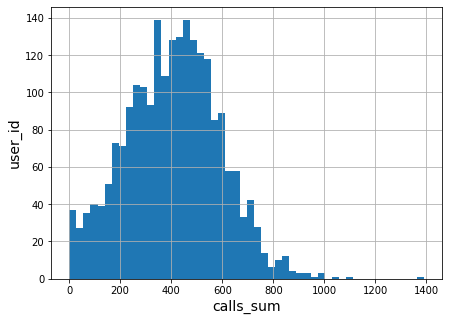

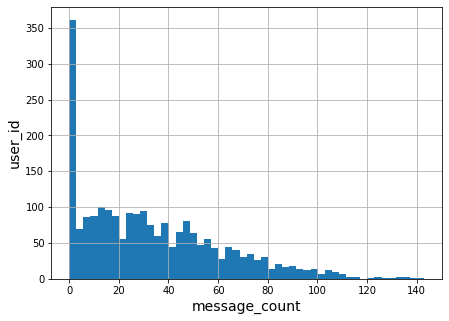

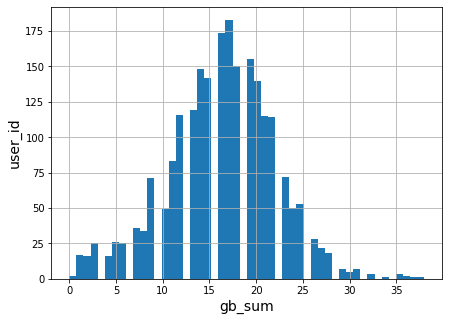

In [36]:
#total_users_smart.boxplot(['calls_sum'])
#total_users_smart['calls_sum'].hist(bins = 100, range= (0,2000))
columns = ['calls_sum', 'message_count', 'gb_sum']
for i in columns:
    total_users_smart[i].hist(bins = 50, figsize = (7,5))
    plt.xlabel(i, fontsize = 14)
    plt.ylabel('user_id', fontsize = 14)
    plt.show()

Звонки -
* распределение - нормальное, количесьво минут поделено примрено по полам, половине хватило встроенных в трафик 500 мин, остальным нет

СМС - 
* Похоже на распределение Пауссона,(если бы не 0) либо гамма распределение. Значительной части хватило встроенных 50 смс, многие смс вообще не пользуются

Интернет -
* Распределение -  нормальное, только большенству в отличае от звонков, траффика не хватило



In [37]:
var_call = np.var(total_users_ultra['calls_sum'], ddof=1)
var_sms = np.var(total_users_ultra['message_count'], ddof=1)
var_int = np.var(total_users_ultra['gb_sum'], ddof=1)
print(var_call)
print(var_sms)
print(var_int)

94898.83885931245
2285.266142544674
97.09168626965457


In [38]:
std_call = np.std(total_users_ultra['calls_sum'], ddof=1)
std_sms = np.std(total_users_ultra['message_count'], ddof=1)
std_int = np.std(total_users_ultra['gb_sum'], ddof=1)
print(std_call)
print(std_sms)
print(std_int)

308.0565513981361
47.80445735017472
9.853511367510293


In [39]:
mean_call = total_users_ultra['calls_sum'].mean()
mean_sms = total_users_ultra['message_count'].mean()
mean_int = total_users_ultra['gb_sum'].mean()
print(mean_call)
print(mean_sms)
print(mean_int)

511.7035532994924
49.36345177664975
19.494416243654822


Звонки для тарифа Ультра -
* Среднее = 511.7, Дисперсия = 94898.8, стандартное отклонение = 308

СМС для тарифа Ультра -
* Среднее = 49.3, дисперсия = 2285.2, стандартное отклонение = 47.8

Интернет для тарифа Ультра -
* Среднее = 19.4, дисперсия = 97, стандартное отклонение = 9.8

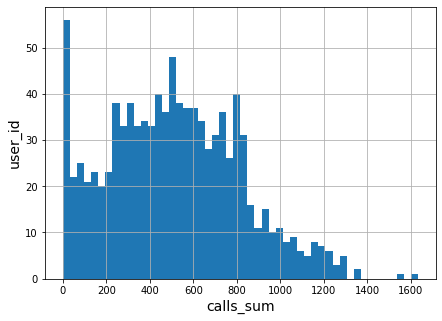

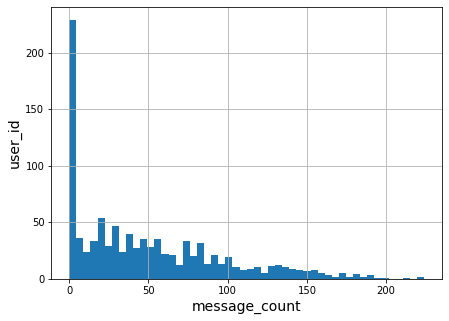

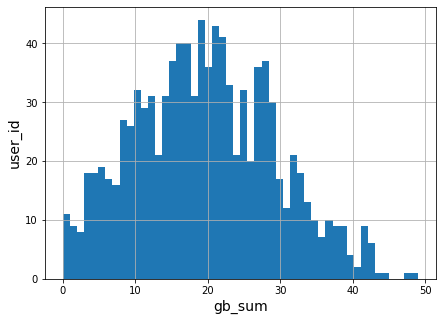

In [40]:
columns = ['calls_sum', 'message_count', 'gb_sum']
for i in columns:
    total_users_ultra[i].hist(bins = 50, figsize = (7,5))
    plt.xlabel(i, fontsize = 14)
    plt.ylabel('user_id', fontsize = 14)
    plt.show()

Звонки -
* распределение - Пауссона, 3000 минут хватило всем, удивительно, но есть приличная прослойка людей с 0 минутами.

СМС - 
* Гамма распределение. Встроеных смс хватило всем. максимум отправляли в районе 200 шт

Интернет -
* Распределение -  нормальное, большенству встроенных 30 гб хватилось, около 25% докупали еще трафик



In [41]:
total = pd.concat([total_users_smart,total_users_ultra], ignore_index=True)

тк для проверки гипотиз удобнее использовать 1 таблицу, я обьеденил таблицы в одну.

H0 - средняя выручка пользователей тарифов «Ультра» и «Смарт» равна;

H1 - средняя выручка пользователей тарифов «Ультра» и «Смарт» не равна;

In [46]:
sample_1 = total.loc[total.query('tariff=="smart"')['user_id'],'revenue']
sample_2 = total.loc[total.query('tariff=="ultra"')['user_id'],'revenue']
alpha = 0.05
results = st.ttest_ind(
    sample_1, 
    sample_2)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение: 7.129167185340462e-09
Отвергаем нулевую гипотезу


Нулевая гипотиза не подтвердилась. Средняя выручка у наших тарифов различается 



H0 - средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов

H1 - средняя выручка пользователей из Москвы  отличается от выручки пользователей из других регионов

In [43]:
sample_3 = total.loc[total.query('city=="Москва"')['user_id'],'revenue']
sample_4 = total.loc[total.query('city!="Москва"')['user_id'],'revenue']
alpha = 0.05
results = st.ttest_ind(
    sample_3, 
    sample_4)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение: 0.00034693783279202665
Отвергаем нулевую гипотезу


Нулевая гепотиза не подтвердилась, выручка в столице и регионах не равны.

Я использовал проверку гипотиз равенства двух генерельных совокупностей методом scipy.stats.ttest_ind

-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-

 По предоставленным мне данным я провел небольшое исследование. Надо отметить что данные пришли ко мне в хорошем виде, и практически не тредовали предобработки.
     Вывод по тарифам, тариф смарт +-:
     
 Тариф среднего сегмента, большенству пользователей данного тарифа не хватило встроеннх 15 гб интернет трафика и они его докупали, похожая ситуация с звонками, но тут пользователи поделились практически пополам.
 С одной стороны это хорошо, так выручка с клиента сильно растет засчет трат на дополнительный тарфик или минуты, с другой стороны пользователю зачастую удобнее заплатить изначально больше и не замарачиваться с докукой пакетов гб и тп.
   Исходя из данных и своих выводов я могу дать некоторые рекомендации:
   1. Создать и добавить в линейку дополнительно 2 тарифа, 1 с большим количеством минут, другой с большим количеством трафика. сделать цену на них в районе 800-900 руб, это и не 2000 как за тариф ультра и гораздо выгоднее чем докупать гигабайты и минут, возможно будут убытки при переходе, тк люди станут меньше тратить в месяц, однако в перспективе при большой конкуренции, для удержания клиентов такой шаг оправдан. 
   2. Поручить отделу по работе с клиентами выявлять клиентов чью траты значительно выше по тарифу и предлагать им либо тариф ультра, либо новые (кто то их выборки тратил в месяц 35+гб 200*20 4000, может человек и не знал о существовании тарифа ультра?)
   
   Тариф ультра - отличный тариф для тех кому неохото "париться" об остатках минут и трафика, однако пара замечаний у меня есть и по нему:
   Практически никто из пользователей не исрасходовал время разговора по тарифу, при этом много людей у которых разговоров вообще не было, наверняка они брали этот тариф для интернета, с другой стороны 30гб в тарифе за 2000 явно маловато. Предлагаю:
   
   1. Переименовать тариф в "безлимит", и действительно сделать звонки безлимитными, все равно их никто не тратит до конца.
   2. Добавить еще 10 гб интернет трафика
   3. Как вариант сделать вместо 1, 2 тарифа -  "безлимитный болтун" для звонков и "цифровой безлимит" для интернета, соответственно в обоих тарифах ограничить минуты и гигабайты у противоположного тарифа.
   
   В конце исследования я проверил 2 гипотезы, равенства выручки тарифов и равенства выручки в регионах и столице.
   
   В обоих случая гипотезы не подтвердились.
    В первом - несмотря на то что некоторые пользователи тарифа смарт докупали минуты и гигабайты их было не так много тариф ультра стоит почти в 4 раза дороже
   
   Во втором случае выручка в регионах и в Москве оказались разным, в москве поределенно выше, тк уровень жизни и зарплаты тут выше. Так же в Москве больше порытие 4г соответственно больше того же интернет трафика люди тратят. И в целом Москва на порядок более развитый город в цифровом плане, где многие люди без интернета могут с ума сойти. В провинции в этом плане люди спокойнее.
   
   